In [1]:
#Importing Neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data Cleaning and Data Preparation For Model Training

In [2]:
#Importing the Dataset
df_train =pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
#Importing the Dataset
df_test =pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
#Merging Both the dataset
df=df_train.merge(df_test,how='outer')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# Basic info about the  dataframe
df.shape

(783667, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [9]:
#Changing Datatype of Columns

df['Gender']=df['Gender'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     783667 non-null  int64   
 1   Product_ID                  783667 non-null  object  
 2   Gender                      783667 non-null  category
 3   Age                         783667 non-null  object  
 4   Occupation                  783667 non-null  int64   
 5   City_Category               783667 non-null  object  
 6   Stay_In_Current_City_Years  783667 non-null  object  
 7   Marital_Status              783667 non-null  category
 8   Product_Category_1          783667 non-null  int64   
 9   Product_Category_2          537685 non-null  float64 
 10  Product_Category_3          237858 non-null  float64 
 11  Purchase                    550068 non-null  float64 
dtypes: category(2), float64(3), int64(3), object(4)
memory usa

In [11]:
df.describe()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
#Dropping the column with does not have much significance in insight generation
df.drop(columns='User_ID',inplace=True)


In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
def func(x):
    if x=='F':
        x=0
    elif x=='M':
        x=1
    return x

In [15]:
#Handling categorical feature Gender
df['Gender']=df['Gender'].apply(func)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
#Handling categorical feature Age
df['Age'].unique()

def func1(y):
    if y=='0-17':
        y=1
    elif y=='18-25':
        y=2
    elif y=='26-35':
        y=3
    elif y=='36-45':
        y=4
    elif y=='46-50':
        y=5
    elif y=='51-55':
        y=6
    elif y=='55+':
        y=7
    return y


In [17]:
df['Age']=df['Age'].apply(func1)

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
#Handling categorical feature Age
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
df['City_Category']=df['City_Category'].map({'A':0,'B':1,'C':3})

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [22]:
#Checking Missing Values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [23]:
#replacing the missing value with mode
df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(value=df['Product_Category_2'].mode()[0])

In [24]:
df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(value=df['Product_Category_3'].mode()[0])

In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [26]:
df.info()
#We need to change Stay_In_Current_City_Years datatype into 'int' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Product_ID                  783667 non-null  object  
 1   Gender                      783667 non-null  category
 2   Age                         783667 non-null  int64   
 3   Occupation                  783667 non-null  int64   
 4   City_Category               783667 non-null  int64   
 5   Stay_In_Current_City_Years  783667 non-null  object  
 6   Marital_Status              783667 non-null  category
 7   Product_Category_1          783667 non-null  int64   
 8   Product_Category_2          783667 non-null  float64 
 9   Product_Category_3          783667 non-null  float64 
 10  Purchase                    550068 non-null  float64 
dtypes: category(2), float64(3), int64(4), object(2)
memory usage: 55.3+ MB


In [27]:
 df[df['Stay_In_Current_City_Years']=='4+']

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969.0
19,P00249542,1,3,12,3,4+,1,1,5.0,15.0,19614.0
20,P00220442,1,3,12,3,4+,1,5,14.0,16.0,8584.0
21,P00156442,1,3,12,3,4+,1,8,8.0,16.0,9872.0
22,P00213742,1,3,12,3,4+,1,8,8.0,16.0,9743.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,1,4+,1,8,8.0,16.0,NaN
783663,P00254642,0,3,15,1,4+,1,5,8.0,16.0,NaN
783664,P00031842,0,3,15,1,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,3,4+,0,10,16.0,16.0,NaN


In [28]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [29]:
#We successfully removed the 4+ value which was a hinderence to us in changing the datatype
df['Stay_In_Current_City_Years'].unique()


array(['2', '4', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')
df['Gender']=df['Gender'].astype('string')
df['Marital_Status']=df['Marital_Status'].astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  string 
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int32  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(4), object(1), string(1)
memory usage: 59.8+ MB


In [32]:
##Visualization
pc1=df['Product_Category_1'].mean()
pc2=df['Product_Category_2'].mean()
pc3=df['Product_Category_3'].mean()
empty_list=[]
empty_list.append(pc1)
empty_list.append(pc2)
empty_list.append(pc3)
empty_list


[5.366196356360546, 9.265541358765905, 14.988857512183108]

In [33]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Age', ylabel='Purchase'>

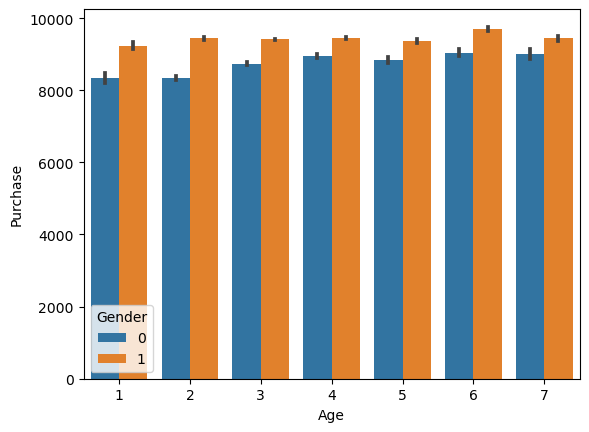

In [34]:
#Visulaization between Age and Purchasing power
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

## Observation 1

1.1 - Purchasing power of Mans and Greater than womens


C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

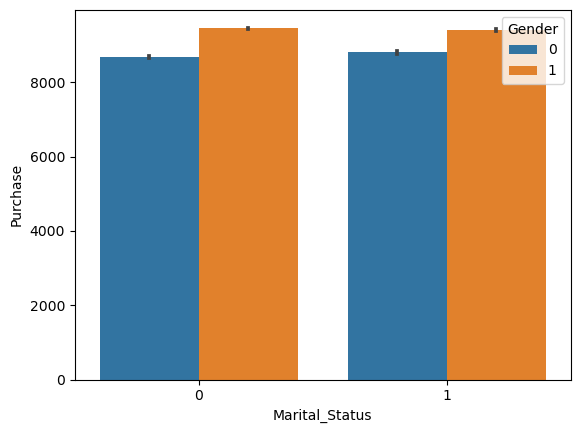

In [35]:
#Visulaization between Marital and Purchasing power
sns.barplot(x='Marital_Status', y ='Purchase', hue='Gender',data=df)

In [36]:
##it is uniforn 

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Occupation', ylabel='Purchase'>

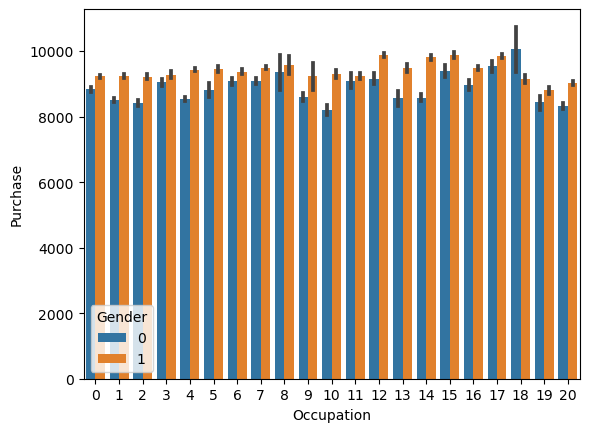

In [37]:
#Visulaization between Occupation and Purchasing power
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

In [38]:
##it is pretty uniforn

In [39]:
df.columns


Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

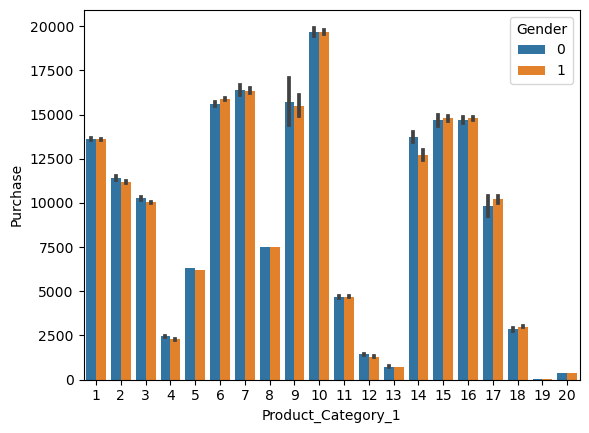

In [40]:
#Visulaization between Occupation and Purchasing power

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

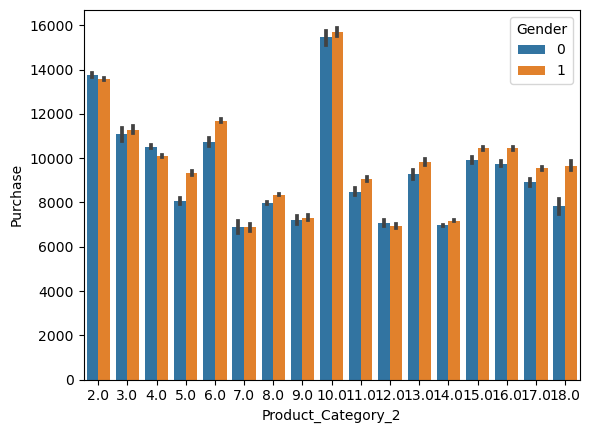

In [41]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)


C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

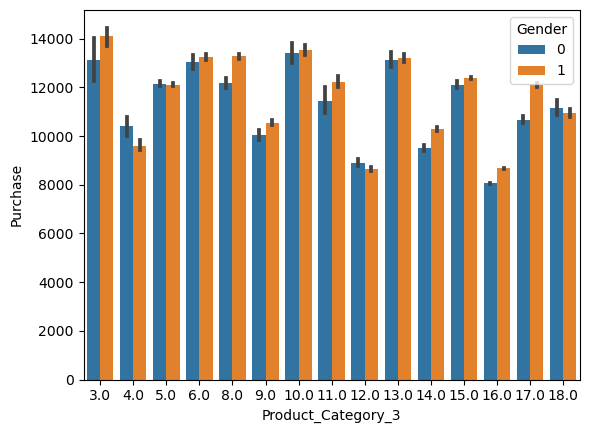

In [42]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

## Observation 2 :
2.1 - Product Category 1 has been sold the most with about 20,000 purchases

In [43]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [44]:
df_train=df[~df['Purchase'].isnull()]

In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,1,10,0,2,0,3,8.0,16.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0


In [47]:
y=df_train['Purchase']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [49]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [50]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and

In [51]:
## train ur model